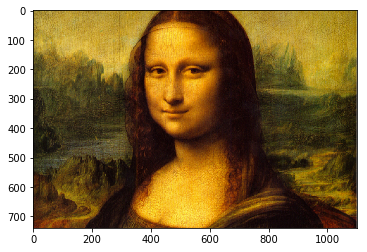

In [1]:
"""
Part 2
"""
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

img = mpimg.imread('MonaLisa.png')
plt.imshow(img)

In [2]:
import random
samples = []
used_pts = set()
for i in xrange(5000):
    rand_x = random.randint(0, img.shape[0]-1)
    rand_y = random.randint(0, img.shape[1]-1)
    if((rand_x, rand_y) not in used_pts):
        used_pts.add((rand_x,rand_y))
        samples.append((rand_x,rand_y))

samples = np.array(samples)

In [3]:
def preprocess(data):
    r_data = []
    g_data = []
    b_data = []
    for pt in data:
        r,g,b,_ = img[pt[0]][pt[1]]
        r_data.append(r)
        g_data.append(g)
        b_data.append(b)

    return r_data, g_data, b_data

r_d, b_d, g_d = preprocess(samples)

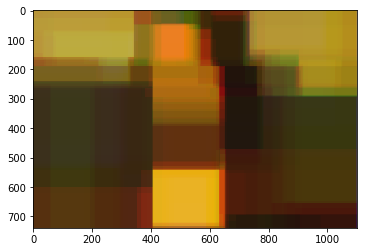

In [4]:
# sklearn's random forest regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor

def get_random_forest(data, labels, max_depth=2, n_estimators=10):
    regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    regr.fit(data,labels)
    
    return regr

def get_rgb_forests(points, red_data, blue_data, green_data, max_depth, n_estimators):
    r_tree = get_random_forest(points, red_data, max_depth, n_estimators)
    g_tree = get_random_forest(points, green_data, max_depth, n_estimators)
    b_tree = get_random_forest(points, blue_data, max_depth, n_estimators)
    return r_tree, g_tree, b_tree

def get_color_predictions(red_tree, blue_tree, green_tree):
    ret = np.zeros(img.shape)
    xs = []
    for x in xrange(img.shape[0]):
        for y in xrange(img.shape[1]):
            xs.append((x,y))
    
    r_preds = red_tree.predict(xs)
    b_preds = blue_tree.predict(xs)
    g_preds = green_tree.predict(xs)
    for i in xrange(len(r_preds)):
        red = r_preds[i]#int(r_preds[i] * 255.0)
        green = g_preds[i]#int(g_preds[i] * 255.0)
        blue = b_preds[i]#int(b_preds[i] * 255.0)
        x = i / img.shape[1]
        y = i - img.shape[1] * x
        ret[x][y] = [red,green,blue, 1.0]
        
    ret = np.array(ret)
    return ret

def print_image(color_array):
    plt.clf()
    plt.imshow(color_array)
    plt.show()
    
r_t, b_t, g_t = get_rgb_forests(samples, r_d, b_d, g_d, 5, 10)
new_img = get_color_predictions(r_t, b_t, g_t)
print_image(new_img)

Depth 1


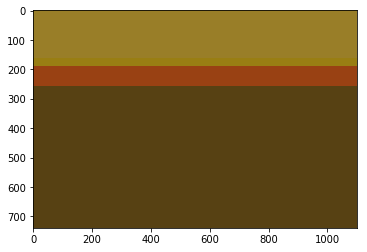

Depth 2


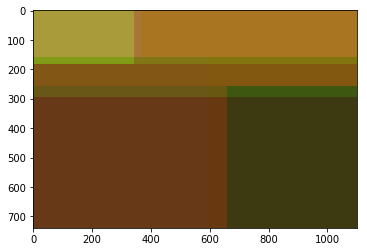

Depth 3


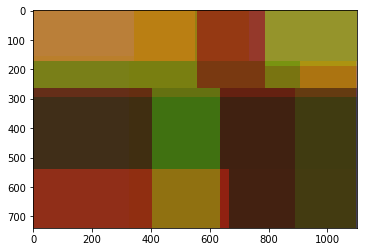

Depth 5


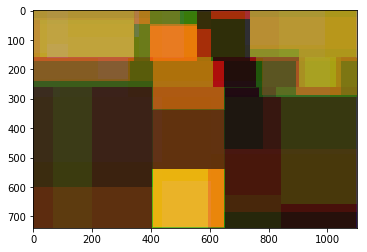

Depth 10


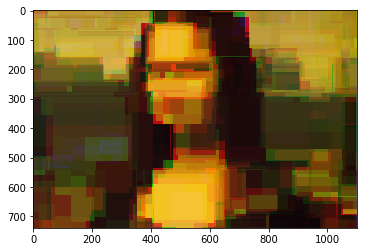

Depth 15


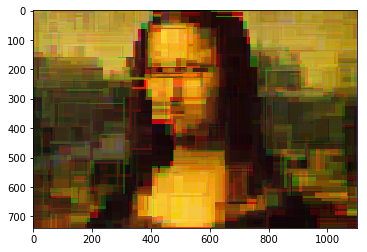

In [5]:
for depth in (1, 2, 3, 5, 10, 15):
    r_t, b_t, g_t = get_rgb_forests(samples, r_d, b_d, g_d, depth, 1)
    new_img = get_color_predictions(r_t, b_t, g_t)
    print('Depth {0}'.format(depth))
    print_image(new_img)

Trees 1


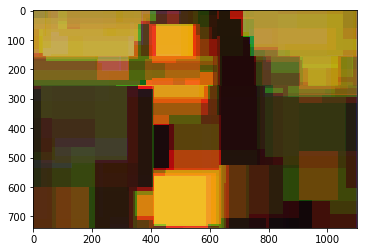

Trees 3


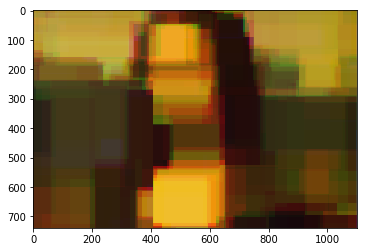

Trees 5


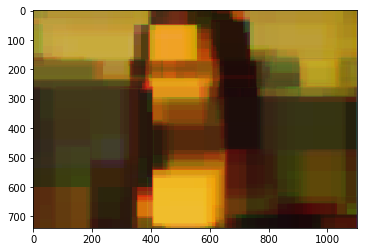

Trees 10


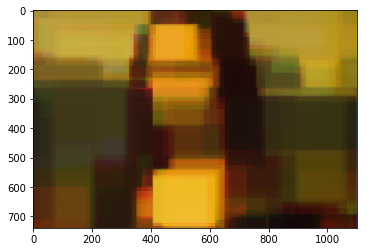

Trees 100


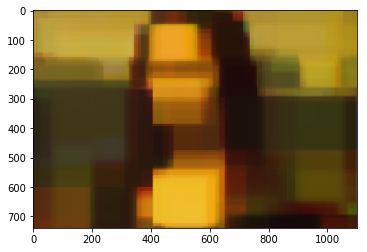

In [6]:
for trees in (1, 3, 5, 10, 100):
    r_t, b_t, g_t = get_rgb_forests(samples, r_d, b_d, g_d, 7, n_estimators=trees)
    new_img = get_color_predictions(r_t, b_t, g_t)
    print('Trees {0}'.format(trees))
    print_image(new_img)

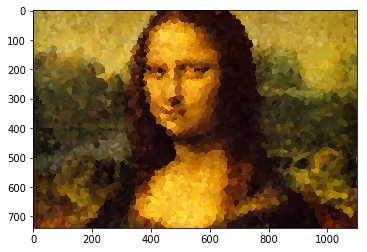

In [7]:
"""
Part 2.E.III
"""
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=1).fit(samples)

xs = []
knn_img = np.zeros(img.shape)
for x in xrange(knn_img.shape[0]):
    for y in xrange(knn_img.shape[1]):
        xs.append((x,y))

_,indices = nbrs.kneighbors(xs)
for i in xrange(len(xs)):
    x,y = xs[i]
    img_x, img_y = samples[indices[i][0]]
    knn_img[x][y] = img[img_x][img_y]

print_image(knn_img)

Experiment 1: depth 15 trees 1 min_samples_leaf 1


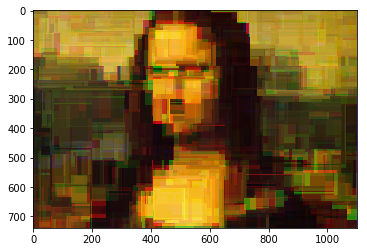

Experiment 1: depth 15 trees 1 min_samples_leaf 100


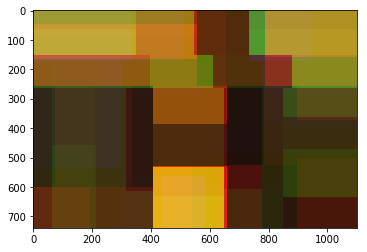

Experiment 1: depth 15 trees 1 min_samples_leaf 1000


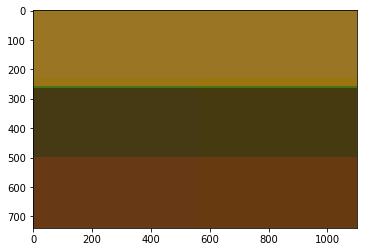

Experiment 1: depth 15 trees 1 min_samples_leaf 1000000


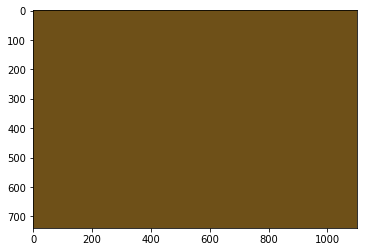

In [54]:
"""
Part 2.E.IV
"""
def get_random_forest_experiment(data, labels, max_depth=2, n_estimators=10, min_samples_leaf=1, min_weight_fraction_leaf=0., max_leaf_nodes=None):
    regr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_leaf_nodes=max_leaf_nodes)
    regr.fit(data,labels)
    
    return regr

def get_rgb_forests_experiment(points, red_data, blue_data, green_data, max_depth, n_estimators, min_samples_leaf=1, min_weight_fraction_leaf=0., max_leaf_nodes=None):
    r_tree = get_random_forest_experiment(points, red_data, max_depth, n_estimators, min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_leaf_nodes=max_leaf_nodes)
    g_tree = get_random_forest_experiment(points, green_data, max_depth, n_estimators, min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_leaf_nodes=max_leaf_nodes)
    b_tree = get_random_forest_experiment(points, blue_data, max_depth, n_estimators, min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_leaf_nodes=max_leaf_nodes)
    return r_tree, g_tree, b_tree

for min_samples in (1, 100, 1000, 1000000):
    print('Experiment 1: depth 15 trees 1 min_samples_leaf {0}'.format(min_samples))
    r_t1, b_t1, g_t1 = get_rgb_forests_experiment(samples, r_d, b_d, g_d, 15, 1, min_samples_leaf=min_samples)
    new_img1 = get_color_predictions(r_t1, b_t1, g_t1)
    print_image(new_img1)

Experiment 2: depth 15 trees 1 min_weight 0.0


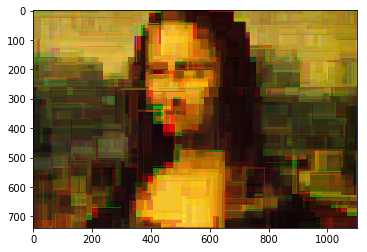

Experiment 2: depth 15 trees 1 min_weight 0.1


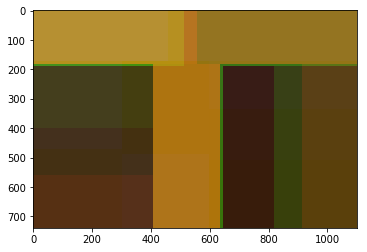

Experiment 2: depth 15 trees 1 min_weight 0.5


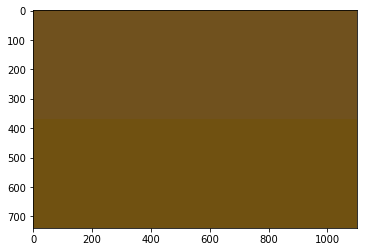

In [55]:
"""
Part 2.E.IV Continued
"""
for min_weight in (0., 0.1, 0.5):
    print('Experiment 2: depth 15 trees 1 min_weight {0}'.format(min_weight))
    r_t1, b_t1, g_t1 = get_rgb_forests_experiment(samples, r_d, b_d, g_d, 15, 1, min_weight_fraction_leaf=min_weight)
    new_img1 = get_color_predictions(r_t1, b_t1, g_t1)
    print_image(new_img1)

Experiment 2: depth 15 trees 1 max leaf nodes 2


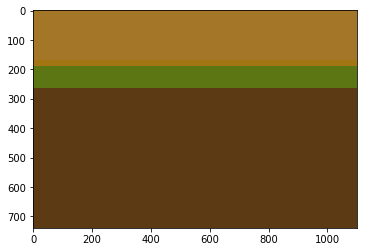

Experiment 2: depth 15 trees 1 max leaf nodes 10


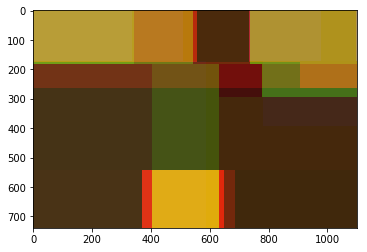

Experiment 2: depth 15 trees 1 max leaf nodes 100


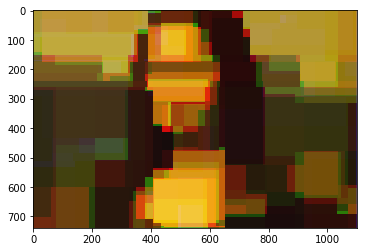

Experiment 2: depth 15 trees 1 max leaf nodes 1000


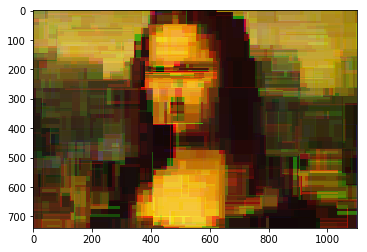

Experiment 2: depth 15 trees 1 max leaf nodes 10000000


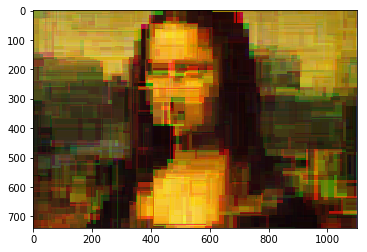

In [57]:
"""
Part 2.E.IV Continued
"""
for max_leaf_nodes in (2, 10, 100, 1000, 10000000):
    print('Experiment 2: depth 15 trees 1 max leaf nodes {0}'.format(max_leaf_nodes))
    r_t1, b_t1, g_t1 = get_rgb_forests_experiment(samples, r_d, b_d, g_d, 15, 1, max_leaf_nodes=max_leaf_nodes)
    new_img1 = get_color_predictions(r_t1, b_t1, g_t1)
    print_image(new_img1)

In [36]:
"""
Part 2.F.I
"""
from sklearn.tree import _tree
regr = RandomForestRegressor(n_estimators=1, max_depth=2)
regr.fit(samples,r_d)

tree_ = regr.estimators_[0].tree_

# The tree visualization code below is borrowed from KDnuggets.com
# CITATION: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
feature_names = ['Y', 'X']
feature_name = [
    feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
    for i in tree_.feature
]

def recurse(node, depth):
    indent = "  " * depth
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = feature_name[node]
        threshold = tree_.threshold[node]
        print "{}if {} <= {}:".format(indent, name, threshold)
        recurse(tree_.children_left[node], depth + 1)
        print "{}else:  # if {} > {}".format(indent, name, threshold)
        recurse(tree_.children_right[node], depth + 1)
    else:
        print "{}return {}".format(indent, tree_.value[node])
        
recurse(0, 1)

  if Y <= 188.5:
    if X <= 543.5:
      return [[ 0.71891991]]
    else:  # if X > 543.5
      return [[ 0.55748315]]
  else:  # if Y > 188.5
    if X <= 651.5:
      return [[ 0.43606555]]
    else:  # if X > 651.5
      return [[ 0.26979211]]
